In [38]:
!pip install matplotlib
!pip install opencv-python

In [39]:
import numpy as np
import cv2
import string 
import os
import matplotlib.pyplot as plt

In [40]:
#ASCII COnversion
d={chr(i):i for i in range(255)}
c={i:chr(i) for i in range(255)} 


In [ ]:
# message and Encryption key Inputing takeing for User
text=input("Enter Your Text :")
key=input("Enter The Key :")

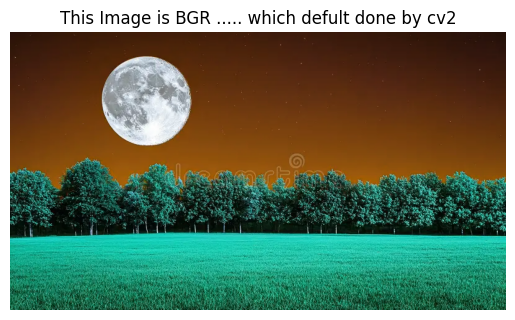

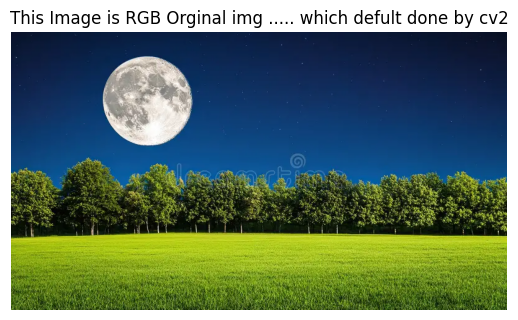

In [42]:
#Loaning the img
image_path = r"new.webp"
x=cv2.imread(image_path)
x # as print ... ok arshad

xrgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.title("This Image is BGR ..... which defult done by cv2")
plt.imshow(x)
plt.axis('off')
plt.show()

plt.title("This Image is RGB Orginal img ..... which defult done by cv2")

plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [43]:
#Encrypt using pixel modelfication 
x_enc=x.copy()
# print if you needed  x_enc
#c,r,colorpanle
n=0  #num of rows
m=0 # num of clooums
z=0 #colour panel
l=len(text)
kl=0  # index of the key

for i in range(l):
    char_val=d[text[i]] ^ d[key[kl]]
    for bit_pos in range(8):
        bit=(char_val >> (7-bit_pos)) & 1   # imp ......very imp
        org_val = x_enc[n,m,z]
        x_enc[n,m,z]=(org_val & 0b11111110)| bit  # imp  0b11111110
        print(f"Embedding bit {bit} of '{text[i]}' at ({n},{m},{z}) original={org_val} new={x_enc[n, m, z]}")

        z=(z+1)%3
        if z==0:
            m=m+1
            if m==x_enc.shape[1]:
                m=0
                n=n+1
    kl=(kl+1)%len(key)
#ok
print(d[text[1]] ^ d[key[1]])

Embedding bit 0 of 'A' at (0,0,0) original=41 new=40
Embedding bit 1 of 'A' at (0,0,1) original=18 new=19
Embedding bit 1 of 'A' at (0,0,2) original=11 new=11
Embedding bit 1 of 'A' at (0,1,0) original=41 new=41
Embedding bit 0 of 'A' at (0,1,1) original=18 new=18
Embedding bit 1 of 'A' at (0,1,2) original=11 new=11
Embedding bit 0 of 'A' at (0,2,0) original=41 new=40
Embedding bit 1 of 'A' at (0,2,1) original=18 new=19
Embedding bit 0 of 'r' at (0,2,2) original=11 new=10
Embedding bit 1 of 'r' at (0,3,0) original=41 new=41
Embedding bit 0 of 'r' at (0,3,1) original=18 new=18
Embedding bit 0 of 'r' at (0,3,2) original=11 new=10
Embedding bit 0 of 'r' at (0,4,0) original=43 new=42
Embedding bit 1 of 'r' at (0,4,1) original=18 new=19
Embedding bit 1 of 'r' at (0,4,2) original=11 new=11
Embedding bit 1 of 'r' at (0,5,0) original=43 new=43
Embedding bit 0 of 's' at (0,5,1) original=18 new=18
Embedding bit 1 of 's' at (0,5,2) original=11 new=11
Embedding bit 0 of 's' at (0,6,0) original=43 

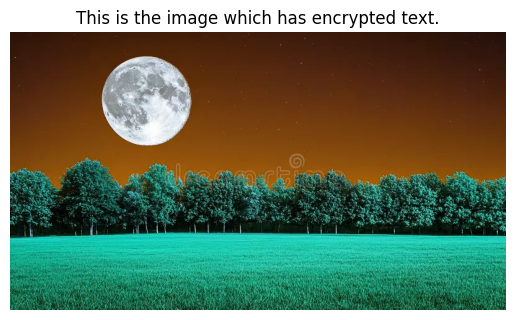

[[[ 40  19  11]
  [ 41  18  11]
  [ 40  19  10]
  ...
  [ 36  16   8]
  [ 36  16   8]
  [ 36  16   8]]

 [[ 41  18  11]
  [ 41  18  11]
  [ 41  18  11]
  ...
  [ 36  16   8]
  [ 36  16   8]
  [ 36  16   8]]

 [[ 41  18  11]
  [ 41  18  11]
  [ 41  18  11]
  ...
  [ 36  16   8]
  [ 36  16   8]
  [ 36  16   8]]

 ...

 [[  0  58  23]
  [ 62 154 118]
  [ 51 145 109]
  ...
  [  3  58  29]
  [ 75 130 101]
  [  9  64  35]]

 [[ 51 150 114]
  [ 81 178 142]
  [ 56 142 108]
  ...
  [ 56 112  82]
  [ 39  92  62]
  [  0  49  21]]

 [[ 29 125  89]
  [ 35 124  89]
  [  4  79  46]
  ...
  [ 50 114  81]
  [ 52 106  75]
  [  0  44  13]]]


In [44]:
plt.title("This is the image which has encrypted text.")
plt.imshow(x_enc)
plt.axis('off')
plt.show()

print(x_enc)

In [47]:
#decryption
n,m,z=0,0,0
kl=0
l=len(text)
de=""
for i in range(l):
    val=0
    for bit_pos in range(8):
        bit = x_enc[n,m,z] & 1  #  0b11111110
        val = (val << 1) | bit
        print(f"Reading bit {bit} from ({n},{m},{z})")
        z=(z+1)%3
        if z==0:
            m=m+1
            if m==x_enc.shape[1]:
                m=0
                n=n+1
    orig_char=c[val ^ d[key[kl]]]
    de+=orig_char
    print(f"Decrypted Byte : {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    kl=(kl+1)%len(key)
print("Decrpyred :    \t \n",de)

Reading bit 0 from (0,0,0)
Reading bit 1 from (0,0,1)
Reading bit 1 from (0,0,2)
Reading bit 1 from (0,1,0)
Reading bit 0 from (0,1,1)
Reading bit 1 from (0,1,2)
Reading bit 0 from (0,2,0)
Reading bit 1 from (0,2,1)
Decrypted Byte : 117 XOR 52 = 65 -> 'A'
Reading bit 0 from (0,2,2)
Reading bit 1 from (0,3,0)
Reading bit 0 from (0,3,1)
Reading bit 0 from (0,3,2)
Reading bit 0 from (0,4,0)
Reading bit 1 from (0,4,1)
Reading bit 1 from (0,4,2)
Reading bit 1 from (0,5,0)
Decrypted Byte : 71 XOR 53 = 114 -> 'r'
Reading bit 0 from (0,5,1)
Reading bit 1 from (0,5,2)
Reading bit 0 from (0,6,0)
Reading bit 0 from (0,6,1)
Reading bit 0 from (0,6,2)
Reading bit 1 from (0,7,0)
Reading bit 1 from (0,7,1)
Reading bit 1 from (0,7,2)
Decrypted Byte : 71 XOR 52 = 115 -> 's'
Reading bit 0 from (0,8,0)
Reading bit 1 from (0,8,1)
Reading bit 0 from (0,8,2)
Reading bit 1 from (0,9,0)
Reading bit 1 from (0,9,1)
Reading bit 1 from (0,9,2)
Reading bit 0 from (0,10,0)
Reading bit 1 from (0,10,1)
Decrypted Byte